# Board Game Review Prediction

### Presented by Eduonix!

Reviews can make or break a product; as a result, many companies take drastic measures to ensure that their product receives good reviews.  When it comes to board games, reviews and word-of-mouth are everything. In this project, we will be using a linear regression model to predict the average review a board game will receive based on characteristics such as minimum and maximum number of players, playing time, complexity, etc. 

Before we get started, we will need to clone a GitHub repository that contains the data set we will be using. This can be accomplished by installing git, an incredibly useful tool, or by simply downloading the repository using the link provided. Git can be installed by issuing the following command in the terminal:

conda install -c anaconda git

git clone https://github.com/ThaWeatherman/scrapers.git

### 1. Importing Libraries and Loading the Data

After the .csv file 'games.csv' has been copied to the current directory, we can import the data as a Pandas DataFrame. As a DataFrame, we will be able to easily explore the type, amount, and distribution of data.  Furthermore, using a correlation matrix, we can explore the relationships between parameters.  This is an important step in determining the type of machine learning algorithm to utilize. 

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


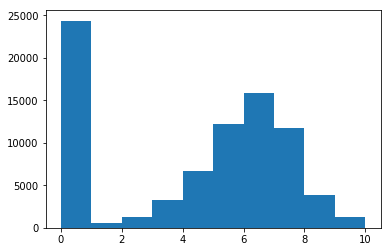

In [7]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read in the data.
games = pandas.read_csv("https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv")
# Print the names of the columns in games.
print(games.columns)
print(games.shape)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

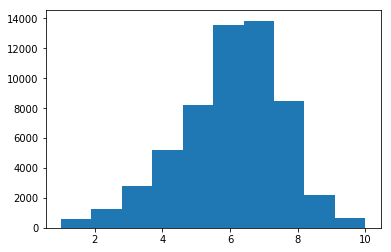

In [8]:
# games[games["average_rating"] == 0]

# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(games[games["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])

# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

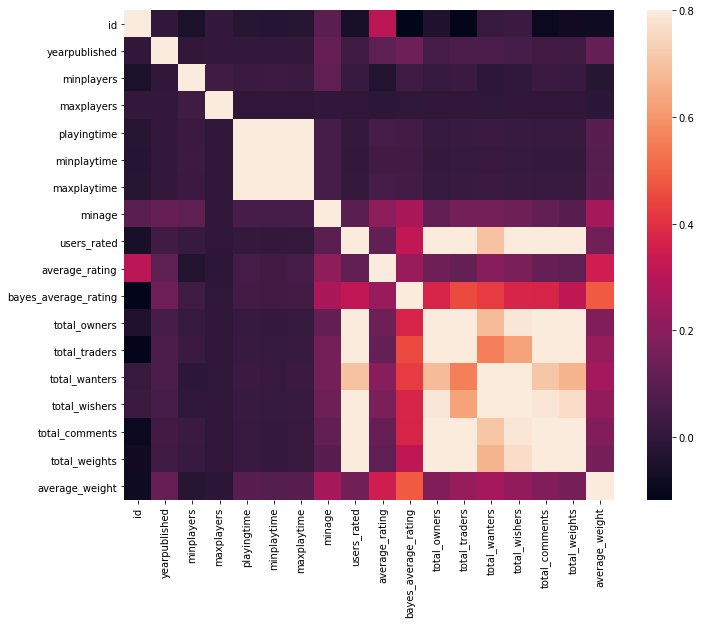

In [9]:
#correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [0]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

### 2. Linear Regression

In the following cells, we will deploy a simple linear regression model to predict the average review of each board game.  We will use the mean squared error as a performance metric.  Furthermore, we will compare and contrast these results with the performance of an ensemble method. 

In [11]:
# Import a convenience function to split the sets.
from sklearn.model_selection import train_test_split
X = games.loc[:, columns].values
y = games.loc[:, 'average_rating'].values
print(columns)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# Generate the training set.  Set random_state to be able to replicate results.
#train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
#test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
#print(train.shape)
#print(test.shape)

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [12]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(X_train, y_train)

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(X_test)
predictions_train = model.predict(X_train)
# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, y_test)

2.084761071254517

[0.0, 2.2273, 1.1429, 1.8095, 1.0, 0.0, 2.5, 1.0, 0.0, 0.0]
(45515,)
[[2.0140e+03 0.0000e+00 0.0000e+00 ... 4.0000e+00 0.0000e+00 0.0000e+00]
 [2.0100e+03 2.0000e+00 2.0000e+00 ... 1.0800e+02 2.2000e+01 2.2273e+00]
 [2.0120e+03 2.0000e+00 4.0000e+00 ... 1.7000e+01 7.0000e+00 1.1429e+00]
 ...
 [2.0110e+03 3.0000e+00 6.0000e+00 ... 2.0000e+00 0.0000e+00 0.0000e+00]
 [2.0110e+03 2.0000e+00 6.0000e+00 ... 5.0000e+00 2.0000e+00 2.0000e+00]
 [2.0120e+03 2.0000e+00 6.0000e+00 ... 2.9800e+02 7.4000e+01 3.6622e+00]]
[5.45286 8.05332 5.34425 ... 8.      6.5     7.25679]


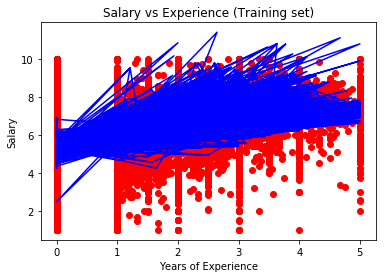

In [13]:
XX = [x[-1] for x in X_train]
print(XX[0:10])
print(predictions_train.shape)
print(X_train)
print(y_train)
plt.scatter(XX, y_train, color = 'red')
plt.plot(XX, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [15]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(X_train, y_train)
# Make predictions.
predictions = model.predict(X_test)
# Compute the error.
mean_squared_error(predictions, y_test)

1.4599222099037266

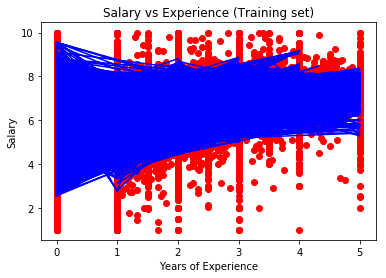

In [16]:
XX = [x[-1] for x in X_train]
#print(XX)
#print(predictions_train.shape)
#print(X_train)
#print(y_train)
plt.scatter(XX, y_train, color = 'red')
plt.plot(XX, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()